# Final Project Python

## Team Members

- **Lý Vĩnh Thuận - 22280092**
- **Nguyễn Nhựt Trường - 22280099**
- **Nguyễn Phạm Anh Văn - 22280104**


# Quest 1

# LLM integration
Purpose: To translate input text from one language to another.

## Config

**Including Single Text and Multiple Texts Translation**

In [ ]:
input_language = "english"
output_language = "vietnamese"

#if the input is a file containing text
# input_path = "......."

#split_string to split long text from file
# split_string = "\n\n"

input_text = "Hello, I am Ben"
input_list_1 = ["Hello", "I am Ben", "tôi là người Việt Nam", "Tôi không thể win được vì tôi thiếu lucky!"]

## Generate API URL with API key to call Gemini model

In [ ]:
url = "https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash:generateContent?key=GEMINI_API_KEY"
headers = {
    "Content-Type": "application/json"
}
api_key = ""
url = url.replace("GEMINI_API_KEY", api_key)

## Prompt

system_prompt:  "You are a translator that translates text from {input_language} to {output_language}. You receive a string written in {input_language} and solely return the same string in {output_language} without losing any of the original formatting. Your translations should be accurate, aiming not to deviate from the original structure, content, writing style and tone. Consider all input text, if the input text contains any word other than {output_language} then translate to {output_language}, the remaining words in the input text remain unchanged. Input text is: "

In [ ]:
system_prompt = f"You are a translator that translates text from {input_language} to {output_language}. You receive a string written in {input_language} and solely return the same string in {output_language} without losing any of the original formatting. Your translations should be accurate, aiming not to deviate from the original structure, content, writing style and tone. Consider all input text, if the input text contains any word other than {output_language} then translate to {output_language}, the remaining words in the input text remain unchanged. Input text is: "

In [ ]:
system_prompt

'You are a translator that translates text from english to vietnamese. You receive a string written in english and solely return the same string in vietnamese without losing any of the original formatting. Your translations should be accurate, aiming not to deviate from the original structure, content, writing style and tone. Consider all input text, if the input text contains any word other than vietnamese then translate to vietnamese, the remaining words in the input text remain unchanged. Input text is: '

## Translation Request

In [ ]:
import time
import requests

In [ ]:
def translate_texts(input_list, system_prompt, url, headers, max_attempts, retry_gap):

    # init results list and counter
    results = []
    counter = 0

    # iterate through each text in the input list
    for text in input_list:
        payload = {
            "contents": [{
                "parts": [{"text": f"{system_prompt} {text}"}]
            }]
        }

        #try sending the request multiple times if get an error
        for attempt in range(max_attempts):
            try:

                response = requests.post(url, headers = headers, json = payload)

                if response.status_code == 200:      # check the response from server, code 200 means the request was successful
                    completion = response.json()
                    print(f"Full response: {completion}")

                    #extract translated text
                    translated_text = (
                        completion.get("candidates", [{}])[0]
                        .get("content", {})
                        .get("parts", [{}])[0]
                        .get("text", "No translation output")
                        .strip()
                    )

                    #add translated text
                    results.append(translated_text)
                    counter += 1
                    print(f"Translated: {counter}/{len(input_list)}")
                    break
                else:
                    # if the response is not code 200 (error)
                    print(f"Error: {response.status_code}, {response.text}")
                    results.append("API Error")
                    break

            # if other errors occur
            except Exception as e:
                print(f"Attempt {attempt + 1} failed with error: {e}")
                if attempt < max_attempts - 1:
                    #time before retry
                    time.sleep(retry_gap)
                    retry_gap *= 1.5
                else:
                    #can not translate
                    print("Max attempts reached. Skipping this text.")
                    results.append("No translation output")

    print("\nTranslation Results:")
    for i, (original, translated) in enumerate(zip(input_list, results)):
        print(f"{i + 1}. Original: {original}\n   Translated: {translated}\n")

    return results


In [ ]:
# configuration
max_attempts = 2  # number of retries if an error occurs
retry_gap = 3.0  # waiting time between retries


In [ ]:
translate_texts(input_list_1, system_prompt, url, headers, max_attempts, retry_gap)

Full response: {'candidates': [{'content': {'parts': [{'text': 'Xin chào\n'}], 'role': 'model'}, 'finishReason': 'STOP', 'avgLogprobs': -2.813120469606171e-05}], 'usageMetadata': {'promptTokenCount': 97, 'candidatesTokenCount': 3, 'totalTokenCount': 100}, 'modelVersion': 'gemini-1.5-flash'}
Translated: 1/4
Full response: {'candidates': [{'content': {'parts': [{'text': 'Tôi là Ben\n'}], 'role': 'model'}, 'finishReason': 'STOP', 'avgLogprobs': -2.4733806640142575e-05}], 'usageMetadata': {'promptTokenCount': 99, 'candidatesTokenCount': 4, 'totalTokenCount': 103}, 'modelVersion': 'gemini-1.5-flash'}
Translated: 2/4
Full response: {'candidates': [{'content': {'parts': [{'text': 'tôi là người Việt Nam\n'}], 'role': 'model'}, 'finishReason': 'STOP', 'avgLogprobs': -0.018310656150182087}], 'usageMetadata': {'promptTokenCount': 101, 'candidatesTokenCount': 6, 'totalTokenCount': 107}, 'modelVersion': 'gemini-1.5-flash'}
Translated: 3/4
Full response: {'candidates': [{'content': {'parts': [{'text

['Xin chào',
 'Tôi là Ben',
 'tôi là người Việt Nam',
 'Tôi không thể thắng được vì tôi thiếu may mắn!']

# Question 2: Chatbot Development
## Access the Product

To use the product, please visit the following link:

[Product on Render](https://prj-python-code.onrender.com/)

We have an error reporting page available. If you encounter any issues or bugs, feel free to report them, and we will get back to you with a solution. (Database: MongoDB)

You can provide feedback, and we will respond to your queries via your provided email.

Your feedback is valuable to us, and we strive to improve the product continuously.

### Deployment Details

When deploying the product, we have configured environment variables on the Render server, which are read through `OS` in the code. For detailed code and configuration, please visit the link below.
[GitHub](https://github.com/ThuanLy-0092/Prj_Python_code/blob/main/Bot.py)

### Performance Considerations

Due to the free tier on Render, there can be a slowdown when deploying. To mitigate this, we have implemented a solution using **Better Stack Uptime**. This service sends a request every 3 minutes to check the web service status and ensure it remains active, preventing any idle shutdown.

### Tools and Technologies Used

- **SparseVec model**: BM25 (Best Matching 25)
- **Dense model**: BGE M3 (using Cosine similarity)
- **LLM**: Llama3 70B
- **VectorDB**: Qdrant
- **ErrorReportingDB**: MongoDB



## 2.1 Data Access and Indexing

### Crawl Data

In [ ]:
import requests
from bs4 import BeautifulSoup
import spacy
import os
import json

class PresightScraper:
    def __init__(self, save_dir="data"):
        self.session = requests.Session()
        self.base_url = "https://www.presight.io/privacy-policy.html"
        self.headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
        }
        self.save_dir = save_dir
        os.makedirs(self.save_dir, exist_ok=True)

        # Load English language model
        self.nlp = spacy.load("en_core_web_sm")

    def get_page_content(self, url):
        try:
            response = self.session.get(url, headers=self.headers)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')


            for unwanted_h2 in soup.find_all('h2', class_="chakra-heading css-18j379d"):
                if "Last updated" in unwanted_h2.get_text(strip=True):
                    unwanted_h2.decompose()

            return soup
        except requests.RequestException as e:
            print(f"Error fetching {url}: {e}")
            return None

    def extract_ordered_content(self, soup):
        ordered_content = []
        current_section = None

        # Get the main content area - adjust selector based on the website structure
        main_content = soup.find('body')

        if main_content:
            for element in main_content.descendants:
                if element.name in ['h1', 'h2', 'h3', 'h4'] and element.string:
                    # Start a new section for each header
                    header = element.get_text(strip=True)
                    current_section = {
                        'header': header,
                        'content': []
                    }
                    ordered_content.append(current_section)
                elif element.name in ['p', 'li'] and current_section:
                    # Get all text, including text from child elements like <span>
                    text = element.get_text(strip=True)
                    if text:
                        # Process text with spaCy
                        doc = self.nlp(text)
                        for sent in doc.sents:
                            clean_sentence = sent.text.strip()
                            if clean_sentence:
                                current_section['content'].append(clean_sentence)

        return ordered_content

    def scrape_page(self):
        print(f"Scraping: {self.base_url}")
        soup = self.get_page_content(self.base_url)
        if soup:
            return self.extract_ordered_content(soup)
        return []

    def save_to_json(self, content, filename):
        file_path = os.path.join(self.save_dir, f"{filename}.json")
        with open(file_path, 'w', encoding='utf-8') as f:
            json.dump(content, f, ensure_ascii=False, indent=4)
        print(f"Data saved to JSON: {file_path}")

def main():
    scraper = PresightScraper(save_dir="output")
    content = scraper.scrape_page()
    scraper.save_to_json(content, 'privacy_policy_final')

if __name__ == "__main__":
    main()


### Insert chunks of text

Here, the team has decided to have two different versions of indexing into the database to evaluate performance.

### Create collection, add Docs function

## BM25 (Best Matching 25)
### Key Concepts:
1. **Term Frequency (TF)**:
   - Measures how often a term appears in a document. The more times a term appears, the more relevant the document is considered for that term.

2. **Inverse Document Frequency (IDF)**:
   - Measures how important a term is across the entire corpus. Rare terms (those that appear in fewer documents) are given more weight than common terms.

3. **Document Length Normalization**:
   - BM25 accounts for the length of the document by introducing a normalization factor to prevent longer documents from being unfairly favored.

### BM25 Formula:
The BM25 score for a document `d` with respect to a query `q` is calculated as:

$$
\text{BM25}(d, q) = \sum_{t \in q} \text{IDF}(t) \cdot \frac{\text{TF}(t, d) \cdot (k_1 + 1)}{\text{TF}(t, d) + k_1 \cdot (1 - b + b \cdot \frac{|d|}{\text{avg_doc_length}})}
$$

Where:
- $t$ is a term in the query $q$.
- $\text{TF}(t, d)$ is the term frequency of $t$ in document $d$.
- $\text{IDF}(t)$ is the inverse document frequency of term $t$.
- $|d|$ is the length of document $d$.
- $\text{avg_doc_length}$ is the average document length in the corpus.
- $k_1$ and $b$ are tuning parameters, usually set to $k_1 = 1.5$ and $b = 0.75$.

### Hybrid Search

**Hybrid Search** combines both **dense retrieval** and **sparse retrieval** to search for documents, optimizing the search results by leveraging the strengths of both methods.

#### How it works:
1. **Dense Retrieval**:
   - The query is converted into **dense embeddings** (semantic vectors), which helps search for documents with similar semantic meanings to the query.

2. **Sparse Retrieval**:
   - The query is converted into **sparse embeddings** (keyword-based vectors), which helps search for documents with keywords that match the query.

3. **Combining Dense and Sparse**:
   - Two queries are performed in parallel: one for **dense embeddings** and one for **sparse embeddings**.
   - The results from both methods are **combined** and **re-ranked** using an algorithm like **Reciprocal Rank Fusion (RRF)** or a similar approach.

4. **Reciprocal Rank Fusion (RRF)**:
   - RRF calculates a score for each document based on its rank in the result list from each method.
   - The **Reciprocal Rank Score** for a document at rank position `rank` in the result list is calculated as:

   $$
   \text{score} = \frac{1}{\text{rank} + k}
   $$

   Where:
   - `rank` is the position of the document in the result list.
   - `k` is a constant, typically chosen as **60**.

   Documents with higher **score** are prioritized in the final results.

5. **Benefits of Hybrid Search**:
   - **High accuracy**: Combines both keyword-based and semantic search.
   - **Optimization**: Leverages the strengths of both dense and sparse retrieval methods.


### Maximal Marginal Relevance (MMR)

**Maximal Marginal Relevance (MMR)** is a technique used in information retrieval and document ranking to improve the diversity of search results while maintaining relevance to the query. MMR aims to select documents that are both relevant to the query and diverse from each other, reducing redundancy in the returned results.

#### How it works:
1. **Relevance and Diversity**:
   - MMR attempts to balance two key factors:
     - **Relevance**: The degree to which a document is related to the query.
     - **Diversity**: The degree to which a document differs from the ones already selected.
   
2. **MMR Formula**:
   - For a given query and set of candidate documents, MMR selects documents based on both relevance and diversity. The formula for MMR is as follows:

   $$
   \text{MMR}(d) = \lambda \cdot \text{Relevance}(d, q) - (1 - \lambda) \cdot \max_{d' \in S} \text{Similarity}(d, d')
   $$

   Where:
   - \( d \) is the candidate document.
   - \( q \) is the query.
   - \( S \) is the set of documents already selected.
   - **Relevance(d, q)** is the relevance score between document \( d \) and the query \( q \).
   - **Similarity(d, d')** is the similarity score between document \( d \) and the previously selected document \( d' \).
   - $( \lambda )$ is a parameter that controls the trade-off between relevance and diversity. It is typically a value between 0 and 1.

3. **Selection Process**:
   - MMR selects documents by considering their relevance to the query and their similarity to the documents already selected.
   - At each step, MMR picks the document with the highest score from the remaining candidates, which is a balance between relevance and diversity.

4. **Benefits of MMR**:
   - **Reduced Redundancy**: MMR helps in minimizing the overlap between the returned documents, ensuring that the results cover a broader range of information.
   - **Improved Diversity**: By considering diversity, MMR can offer a more comprehensive set of results, especially when the query has multiple facets or is vague.
   - **Effective for Ranking**: MMR is especially useful in scenarios like search engines, document summarization, and recommendation systems, where both relevance and diversity matter.

5. **Applications**:
   - **Search Engines**: MMR can be applied to rank search results by ensuring diverse and relevant documents are returned.
   - **Document Summarization**: In extractive summarization, MMR helps select diverse sentences or paragraphs that cover different aspects of the document.
   - **Recommendation Systems**: MMR helps recommend diverse items based on user preferences.

By balancing relevance and diversity, MMR ensures that the final set of documents returned provides a comprehensive and varied response to the query.


In [ ]:
from langchain.embeddings import HuggingFaceInferenceAPIEmbeddings
from langchain_qdrant import QdrantVectorStore,FastEmbedSparse
from qdrant_client.http.models import Distance, VectorParams
from qdrant_client import QdrantClient, models
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings
from langchain.document_loaders import TextLoader

def Create_collection(collectionName):
    # Qdrant client
    QDRANT_URL="https://9ba55ee0-09ef-4c78-8d04-72c6392c0425.us-east4-0.gcp.cloud.qdrant.io"
    QDRANT_API_KEY=""
    client = QdrantClient(
          url=QDRANT_URL,
          api_key=QDRANT_API_KEY,
          prefer_grpc=False
      )

    vector_name = "sparse_vector"
    client.create_collection(
    collection_name=collectionName,
    vectors_config=VectorParams(size=1024, distance=Distance.COSINE),
    sparse_vectors_config={
        vector_name: models.SparseVectorParams(
            index=models.SparseIndexParams(
                on_disk=False,
            )
        )
    }
    )
def add_Documents(collectionName,docs):
    QDRANT_URL="https://9ba55ee0-09ef-4c78-8d04-72c6392c0425.us-east4-0.gcp.cloud.qdrant.io"
    QDRANT_API_KEY=""
    embeddings = HuggingFaceInferenceAPIEmbeddings(
        model_name="BAAI/bge-m3",
        api_key = "",
        model_kwargs = {'device': 'auto'}
    )
    sparse_embeddings = FastEmbedSparse(model_name="Qdrant/bm25",
                                        model_kwargs = {'device': 'auto'})
    qdrant = QdrantVectorStore.from_documents(
        docs,
        embeddings,
        sparse_embedding=sparse_embeddings,
        sparse_vector_name="Qdrant/bm25",
        url=QDRANT_URL,
        prefer_grpc=False,
        collection_name=collectionName,
        api_key=QDRANT_API_KEY,
        timeout=300
    )


### Indexing Based on Chunksize


**The popular chunking method is commonly used in applications related to RAG (Retrieval-Augmented Generation).**

In [ ]:
from langchain.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Qdrant
from langchain.schema import Document

loader_sotay = TextLoader(r"C:\Users\Vinh Thuan\Downloads\privacy_policy.txt", encoding='utf-8')
documents = loader_sotay.load()
text_splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=100)
texts = text_splitter.split_documents(documents)

texts

[Document(metadata={'source': 'C:\\Users\\Vinh Thuan\\Downloads\\privacy_policy.txt'}, page_content='By Role\nBy Team\n\nPRIVACY POLICY\n\n\nLast updated 15 Sep 2023\n\nAt Presight, we are committed to protecting the privacy of our customers and visitors to our website.\nThis Privacy Policy explains how we collect, use, and disclose information about our customers and visitors.'),
 Document(metadata={'source': 'C:\\Users\\Vinh Thuan\\Downloads\\privacy_policy.txt'}, page_content='Information Collection and Use\n\nWe collect several different types of information for various purposes to provide and improve our Service to you.\n\nTypes of Data Collected'),
 Document(metadata={'source': 'C:\\Users\\Vinh Thuan\\Downloads\\privacy_policy.txt'}, page_content='While using our Service, we may ask you to provide us with certain personally identifiable information that can be used to contact or identify you ("Personal Data").\nPersonally identifiable information may include, but is not limited t

In [ ]:
Create_collection("Python_simple_rag")


In [ ]:
add_Documents("Python_simple_rag",texts)

Fetching 1 files: 100%|██████████| 1/1 [00:00<?, ?it/s]


### topic-based indexing


**The chunking method based on topics.**

In [ ]:
import json
from langchain_community.document_loaders import JSONLoader

with open(r"C:\Users\Vinh Thuan\Downloads\privacy_policy_final.json", 'r', encoding='utf-8') as file:
    json_data = json.load(file)

processed_data = []
previous_header = None

for entry in json_data:
    if not entry['content']:
        previous_header = entry['header']
    else:
        if previous_header:
            entry['content'].insert(0, previous_header)
            previous_header = None
        entry['content'].insert(0, entry['header'])
        entry['content'] = ' '.join(entry['content'])
        processed_data.append(entry)

processed_data

processed_file_path = r"C:\Users\Vinh Thuan\Downloads\processed_privacy_policy.json"

with open(processed_file_path, 'w', encoding='utf-8') as file:
    json.dump(processed_data, file, ensure_ascii=False, indent=4)

print(f"Processed data has been saved at {processed_file_path}")

Processed data đã được lưu tại C:\Users\Vinh Thuan\Downloads\processed_privacy_policy.json


In [ ]:
def metadata_func(record: dict, metadata: dict) -> dict:
    metadata["header"] = record.get("header")
    return metadata

loader = JSONLoader(
    file_path=processed_file_path,
    jq_schema='.[]',
    content_key="content",
    metadata_func=metadata_func,
    json_lines=False
)

documents = loader.load()

documents

[Document(metadata={'source': 'C:\\Users\\Vinh Thuan\\Downloads\\processed_privacy_policy.json', 'seq_num': 1, 'header': 'PRIVACY POLICY'}, page_content='PRIVACY POLICY At Presight, we are committed to protecting the privacy of our customers and visitors to our website. This Privacy Policy explains how we collect, use, and disclose information about our customers and visitors.'),
 Document(metadata={'source': 'C:\\Users\\Vinh Thuan\\Downloads\\processed_privacy_policy.json', 'seq_num': 2, 'header': 'Information Collection and Use'}, page_content='Information Collection and Use We collect several different types of information for various purposes to provide and improve our Service to you.'),
 Document(metadata={'source': 'C:\\Users\\Vinh Thuan\\Downloads\\processed_privacy_policy.json', 'seq_num': 3, 'header': 'Types of Data Collected'}, page_content='Types of Data Collected While using our Service, we may ask you to provide us with certain personally identifiable information that can 

In [ ]:
Create_collection("Python_simple_rag2")

In [ ]:
add_Documents("Python_simple_rag2",documents)

Fetching 1 files: 100%|██████████| 1/1 [00:00<?, ?it/s]


## 2.2 Chatbot Development


### Chatbot

In [ ]:
from langchain.chains import create_retrieval_chain
from langchain.prompts import PromptTemplate
from langchain_groq import ChatGroq
from qdrant_client import QdrantClient
from langchain_qdrant import QdrantVectorStore
from langchain_qdrant import FastEmbedSparse, RetrievalMode
from langchain.chains.combine_documents import create_stuff_documents_chain

class RAGPipelineSetup:
    def __init__(self, qdrant_url, qdrant_api_key, huggingface_api_key, embeddings_model_name, groq_api_key):
        self.QDRANT_URL = qdrant_url
        self.QDRANT_API_KEY = qdrant_api_key
        self.HUGGINGFACE_API_KEY = huggingface_api_key
        self.EMBEDDINGS_MODEL_NAME = embeddings_model_name
        self.GROQ_API_KEY = groq_api_key
        self.embeddings = self.load_embeddings()
        self.pipe = self.load_model_pipeline()
        self.prompt = self.load_prompt_template()
        self.current_source = None

    def load_embeddings(self):
        # Load HuggingFace embeddings
        bge_embeddings = HuggingFaceInferenceAPIEmbeddings(
            model_name=self.EMBEDDINGS_MODEL_NAME,
            api_key=self.HUGGINGFACE_API_KEY,
        )
        return bge_embeddings

    def load_retriever(self, retriever_name):
        client = QdrantClient(
            url=self.QDRANT_URL,
            api_key=self.QDRANT_API_KEY,
            prefer_grpc=False
        )

        # Load sparse embedding
        sparse_embeddings = FastEmbedSparse(model_name="Qdrant/bm25")

        db = QdrantVectorStore(
            client=client,
            embedding=self.embeddings,
            sparse_embedding=sparse_embeddings,
            sparse_vector_name="sparse_vector",
            collection_name=retriever_name,
            retrieval_mode=RetrievalMode.HYBRID
        )

        retriever = db.as_retriever(search_kwargs={"k": 3},search_type="mmr")
        return retriever

    def load_model_pipeline(self, max_new_tokens=1024):
        llm = ChatGroq(
            temperature=0,
            groq_api_key=self.GROQ_API_KEY,
            model_name="llama3-70b-8192"
        )
        return llm

    def load_prompt_template(self, source=None):
        query_template = '''
        ### Context:
        {context}

        ### User Question:
        {input}

        ### Instructions for the Assistant:
        1. Carefully read the user's question and analyze the intent.
        2. Search the context provided above for the most accurate and relevant information.
        3. Formulate a clear and concise response to address the user's question.
        4. If the answer cannot be derived directly from the context, politely inform the user and suggest an alternative.

        '''

        prompt = PromptTemplate(template=query_template, input_variables=["context", "input"])
        return prompt

    def load_rag_pipeline(self, llm, retriever, prompt):
        # Retrieval Augmented Generation
        rag_chain = create_retrieval_chain(
            retriever=retriever,
            combine_docs_chain=create_stuff_documents_chain(llm, prompt)
        )

        return rag_chain

    def rag(self, source):
        if source == self.current_source:
            return self.rag_pipeline
        else:
            self.retriever = self.load_retriever(retriever_name=source)
            self.pipe = self.load_model_pipeline()
            self.prompt = self.load_prompt_template(source)
            self.rag_pipeline = self.load_rag_pipeline(llm=self.pipe, retriever=self.retriever, prompt=self.prompt)
            self.current_source = source
            return self.rag_pipeline


**Example**

In [ ]:
rag_pipeline_setup = RAGPipelineSetup(
    qdrant_url="https://9ba55ee0-09ef-4c78-8d04-72c6392c0425.us-east4-0.gcp.cloud.qdrant.io",
    qdrant_api_key="",
    huggingface_api_key="",
    embeddings_model_name="BAAI/bge-m3",
    groq_api_key=""
)

question = "What is the use of data in privacy policy?"

qdrant_collection_name="Python_simple_rag2"
rag_pipeline = rag_pipeline_setup.rag(source=qdrant_collection_name)

inputs = {
    "input": question
}

response = rag_pipeline.invoke(inputs)

response['answer']

Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 813.01it/s]


'According to the privacy policy, the use of data is for the following purposes:\n\n1. To provide and maintain the Service\n2. To notify users about changes to the Service\n3. To allow users to participate in interactive features of the Service\n4. To provide customer support\n5. To gather analysis or valuable information to improve the Service\n6. To monitor the usage of the Service\n7. To detect, prevent, and address technical issues.\n\nThese are the specific uses of data as outlined in the privacy policy.'

In [ ]:
response

{'input': 'What is the use of data in privacy policy?',
 'context': [Document(metadata={'source': 'C:\\Users\\Vinh Thuan\\Downloads\\processed_privacy_policy.json', 'seq_num': 4, 'header': 'Use of Data', '_id': '27152d3b-a152-43a2-891b-2f9397f377d8', '_collection_name': 'Python_simple_rag2'}, page_content='Use of Data Presight uses the collected data for various purposes: To provide and maintain our Service To notify you about changes to our Service To allow you to participate in interactive features of our Service when you choose to do so To provide customer support To gather analysis or valuable information so that we can improve our Service To monitor the usage of our Service To detect, prevent and address technical issues'),
  Document(metadata={'source': 'C:\\Users\\Vinh Thuan\\Downloads\\processed_privacy_policy.json', 'seq_num': 3, 'header': 'Types of Data Collected', '_id': 'f33f6697-1944-47eb-9fdf-32da45edec70', '_collection_name': 'Python_simple_rag2'}, page_content='Types of

### generate Question - Ground truth for Evaluation


In [ ]:
import csv
from langchain_core.prompts import ChatPromptTemplate
from langchain_groq import ChatGroq

chat = ChatGroq(temperature=0, model_name="mixtral-8x7b-32768", groq_api_key="")


qa_pairs = []

# Iterate over each document and generate questions and answers
for doc in documents:
    header = doc.metadata['header']
    content = doc.page_content

    # Define the system and human messages
    system = "You are an AI designed to generate questions and answers from text."
    human = (
        f"Given the following text:\n\n{content}\n\n"
        "1. Formulate a clear and concise question that a reader might ask\n"
        "2. Provide a detailed answer to the question, ensuring the response is informative and directly related to the content."
    )

    prompt = ChatPromptTemplate.from_messages([("system", system), ("human", human)])

    # Combine the prompt and chat model
    chain = prompt | chat

    # Invoke the chain with the document content
    response = chain.invoke({})

    # Process the response content
    response_text = response.content.strip()

    if 'Question:' in response_text and 'Answer:' in response_text:
        # Extract the question and answer
        question_part, answer_part = response_text.split('Answer:', 1)
        question = question_part.replace('Question:', '').strip()
        answer = answer_part.strip()
    else:
        # Handle unexpected formats
        question = "N/A"
        answer = response_text.strip()


    qa_pairs.append((question, answer))

    print(f"Header: {header}")
    print(response_text)
    print("-" * 80)

# Save the questions and answers to a CSV file
with open('questions_answers.csv', 'w', newline='', encoding='utf-8') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['Question', 'Answer'])
    csvwriter.writerows(qa_pairs)


Header: PRIVACY POLICY
Question: What is Presight's commitment to privacy as stated in the text?

Answer: Presight is committed to protecting the privacy of its customers and visitors to its website. This commitment is outlined in their Privacy Policy, which explains how they collect, use, and disclose information about their customers and visitors.
--------------------------------------------------------------------------------
Header: Information Collection and Use
Question: What is the purpose of information collection in the provided text?

Answer: The purpose of information collection in the provided text is to improve and provide the Service. The text mentions that various types of information are collected for different purposes. This implies that the collected data is used to enhance the user experience and optimize the functionality of the Service. However, the text does not specify the exact types of information collected or how they are used.
--------------------------------

In [ ]:
import pandas as pd
QA=pd.read_csv('questions_answers.csv')

In [ ]:
QA

,Question,Answer
0,What is Presight's commitment to privacy as st...,Presight is committed to protecting the privac...
1,What is the purpose of information collection ...,The purpose of information collection in the p...
2,What types of personal data and usage data are...,"When using the service, the following personal..."
3,What are the purposes for which Data Presight ...,Data Presight uses the collected data for seve...
4,Why will I be asked to confirm that my persona...,The text indicates that you will be asked to c...
5,How can I access my personal information held ...,The text states that you have the right to acc...
6,What is the purpose of the automated edit chec...,The automated edit checks employed by Presight...
7,To whom does the company disclose application ...,The company discloses application data to thir...
8,Will my personal data be shared or transferred...,"No, your personal data will not be subject to ..."
9,What is the policy regarding the use of Google...,The policy clearly states that the system does...


### Collect answer from Chatbot

#### Indexing by topic

In [ ]:
QA = pd.read_csv('questions_answers.csv')

answers = []

# Iterate through the questions
for _, row in QA.iterrows():
    question = row['Question']

    inputs = {
        "input": question
    }

    response = rag_pipeline.invoke(inputs)

    # Extract the answer from the response
    answer = response.get('answer', 'No answer found')

    # Append the answer to the list
    answers.append(answer)

QA['LLM_Answer'] = answers

QA.to_csv('questions_answers_with_llm_dtbtopic.csv', index=False)

QA


,Question,Answer,LLM_Answer
0,What is Presight's commitment to privacy as st...,Presight is committed to protecting the privac...,"According to the provided context, Presight's ..."
1,What is the purpose of information collection ...,The purpose of information collection in the p...,The purpose of information collection is to pr...
2,What types of personal data and usage data are...,"When using the service, the following personal...","According to the context, the types of persona..."
3,What are the purposes for which Data Presight ...,Data Presight uses the collected data for seve...,"According to the provided context, Data Presig..."
4,Why will I be asked to confirm that my persona...,The text indicates that you will be asked to c...,You will be asked to confirm that your persona...
5,How can I access my personal information held ...,The text states that you have the right to acc...,You can access your personal information held ...
6,What is the purpose of the automated edit chec...,The automated edit checks employed by Presight...,The purpose of the automated edit checks used ...
7,To whom does the company disclose application ...,The company discloses application data to thir...,"According to the provided context, the company..."
8,Will my personal data be shared or transferred...,"No, your personal data will not be subject to ...","According to the provided context, your person..."
9,What is the policy regarding the use of Google...,The policy clearly states that the system does...,"According to the policy, Presight.io does not ..."


#### Indexing by chunksize

In [ ]:
qdrant_collection_name="Python_simple_rag"
rag_pipeline = rag_pipeline_setup.rag(source=qdrant_collection_name)


Fetching 1 files: 100%|██████████| 1/1 [00:00<00:00, 1060.77it/s]


In [ ]:
answers = []

# Iterate through the questions
for _, row in QA.iterrows():
    question = row['Question']

    inputs = {
        "input": question
    }

    response = rag_pipeline.invoke(inputs)

    # Extract the answer from the response
    answer = response.get('answer', 'No answer found')

    # Append the answer to the list
    answers.append(answer)

QA['LLM_Answer'] = answers

# Optionally, save the updated DataFrame to a new CSV file
QA.to_csv('questions_answers_with_llm_dtbchunksize.csv', index=False)

# Print the DataFrame with the answers
QA


,Question,Answer,LLM_Answer
0,What is Presight's commitment to privacy as st...,Presight is committed to protecting the privac...,"According to the provided context, Presight's ..."
1,What is the purpose of information collection ...,The purpose of information collection in the p...,The purpose of information collection is to pr...
2,What types of personal data and usage data are...,"When using the service, the following personal...","According to the provided context, the types o..."
3,What are the purposes for which Data Presight ...,Data Presight uses the collected data for seve...,"According to the context, Presight utilizes th..."
4,Why will I be asked to confirm that my persona...,The text indicates that you will be asked to c...,You will be asked to confirm that your persona...
5,How can I access my personal information held ...,The text states that you have the right to acc...,You can access your personal information held ...
6,What is the purpose of the automated edit chec...,The automated edit checks employed by Presight...,The purpose of the automated edit checks used ...
7,To whom does the company disclose application ...,The company discloses application data to thir...,"According to the provided context, the company..."
8,Will my personal data be shared or transferred...,"No, your personal data will not be subject to ...","According to our Privacy Policy, your personal..."
9,What is the policy regarding the use of Google...,The policy clearly states that the system does...,"According to our policy, we do not use Google ..."


## 2.3 Evaluation - Bert Score

### BERTScore

**BERTScore** is a method for evaluating the similarity between texts based on the BERT language model. It uses embeddings generated by BERT or similar language models to compare sentences or text passages, allowing for an evaluation of text quality based on semantic meaning rather than just keyword matching.

### How it works:
1. **Embedding Calculation**:
   - BERTScore uses the BERT model to generate embeddings for words in the sentence, and then calculates the similarity between corresponding words in the reference sentence and the candidate sentence.
   
2. **Word-to-Word Comparison**:
   - To evaluate the similarity between the reference sentence and the candidate sentence, BERTScore uses **cosine similarity** between the embeddings of words in each sentence.

3. **BERTScore Metrics**:
   - **Precision**: Calculates the similarity between words in the candidate sentence and the reference sentence.
   - **Recall**: Calculates the similarity between words in the reference sentence and the candidate sentence.
   - **F1 Score**: Derived from precision and recall, it combines both metrics to provide an overall evaluation of the candidate sentence's quality.

4. **Benefits**:
   - **Semantic Evaluation**: BERTScore outperforms traditional methods like BLEU and ROUGE because it considers the meaning of the text rather than just keyword matching.
   - **More Accurate Evaluation**: BERTScore can detect synonymous sentences, where different structures convey the same meaning.
   - **Practicality**: BERTScore is easily applicable to various NLP tasks such as evaluating sentence quality, machine translation, and content generation.

### BERTScore Formulas:

- **Precision**: Calculated using cosine similarity between embeddings of words in the candidate sentence and the reference sentence.

$$
\text{Precision} = \frac{1}{|C|} \sum_{w_i \in C} \max_{w_j \in R} \text{cosine_similarity}(w_i, w_j)
$$

- **Recall**: Calculates the similarity between words in the reference sentence and the candidate sentence.

$$
\text{Recall} = \frac{1}{|R|} \sum_{w_i \in R} \max_{w_j \in C} \text{cosine_similarity}(w_i, w_j)
$$

- **F1 Score**: The harmonic mean of Precision and Recall.

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### Advantages of BERTScore:
- **Vocabulary Independence**: BERTScore doesn't rely on a fixed vocabulary, reducing issues related to vocabulary shifts between sentences.
- **Semantic Handling**: Since BERTScore is based on BERT, it better captures the meaning of the sentence, rather than just focusing on specific words.

### Applications:
- BERTScore is widely used in **evaluating machine translation quality**, **automatic text generation**, **question-answering systems**, and **text summarization**.


### Eval Chunksize Verse

In [ ]:
QA=pd.read_csv('questions_answers_with_llm_dtbchunksize.csv')

In [ ]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
from bert_score import score

def compute_bertscore(row):
    P, R, F1 = score([row['LLM_Answer']], [row['Answer']], lang="en", verbose=True)
    return pd.Series([P.mean().item(), R.mean().item(), F1.mean().item()], index=["Precision", "Recall", "F1"])


QA[['Precision', 'Recall', 'F1']] = QA.apply(compute_bertscore, axis=1)


print(QA[['Question', 'Precision', 'Recall', 'F1']])

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.42 seconds, 0.71 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.06 seconds, 0.49 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.79 seconds, 0.36 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.79 seconds, 0.26 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.57 seconds, 0.39 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.38 seconds, 0.73 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.45 seconds, 0.69 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.24 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.17 seconds, 0.86 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 4.91 seconds, 0.20 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.74 seconds, 0.27 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 0.91 seconds, 1.10 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 1.91 seconds, 0.52 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.30 seconds, 0.44 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.11 seconds, 0.47 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.66 seconds, 0.38 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 2.24 seconds, 0.45 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 4.82 seconds, 0.21 sentences/sec


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 3.09 seconds, 0.32 sentences/sec
                                             Question  Precision    Recall  \
0   What is Presight's commitment to privacy as st...   0.903213  0.899906   
1   What is the purpose of information collection ...   0.925107  0.863681   
2   What types of personal data and usage data are...   0.887342  0.870203   
3   What are the purposes for which Data Presight ...   0.896942  0.883106   
4   Why will I be asked to confirm that my persona...   0.920337  0.906216   
5   How can I access my personal information held ...   0.948165  0.922915   
6   What is the purpose of the automated edit chec...   0.952372  0.915265   
7   To whom does the company disclose application ...   0.932282  0.868267   
8   Will my personal data be shared or transferred...   0.949958  0.923714   
9   What is the policy regarding the use of Google...   0.941722  0.890742   
10  How is data secured in this system, both when ...   0.918203  0.859742   
11  How long is custome

In [ ]:
QA

,Question,Answer,LLM_Answer,Precision,Recall,F1
0,What is Presight's commitment to privacy as st...,Presight is committed to protecting the privac...,"According to the provided context, Presight's ...",0.903213,0.899906,0.901557
1,What is the purpose of information collection ...,The purpose of information collection in the p...,The purpose of information collection is to pr...,0.925107,0.863681,0.893339
2,What types of personal data and usage data are...,"When using the service, the following personal...","According to the provided context, the types o...",0.887342,0.870203,0.878689
3,What are the purposes for which Data Presight ...,Data Presight uses the collected data for seve...,"According to the context, Presight utilizes th...",0.896942,0.883106,0.889971
4,Why will I be asked to confirm that my persona...,The text indicates that you will be asked to c...,You will be asked to confirm that your persona...,0.920337,0.906216,0.913222
5,How can I access my personal information held ...,The text states that you have the right to acc...,You can access your personal information held ...,0.948165,0.922915,0.935369
6,What is the purpose of the automated edit chec...,The automated edit checks employed by Presight...,The purpose of the automated edit checks used ...,0.952372,0.915265,0.933450
7,To whom does the company disclose application ...,The company discloses application data to thir...,"According to the provided context, the company...",0.932282,0.868267,0.899136
8,Will my personal data be shared or transferred...,"No, your personal data will not be subject to ...","According to our Privacy Policy, your personal...",0.949958,0.923714,0.936652
9,What is the policy regarding the use of Google...,The policy clearly states that the system does...,"According to our policy, we do not use Google ...",0.941722,0.890742,0.915523


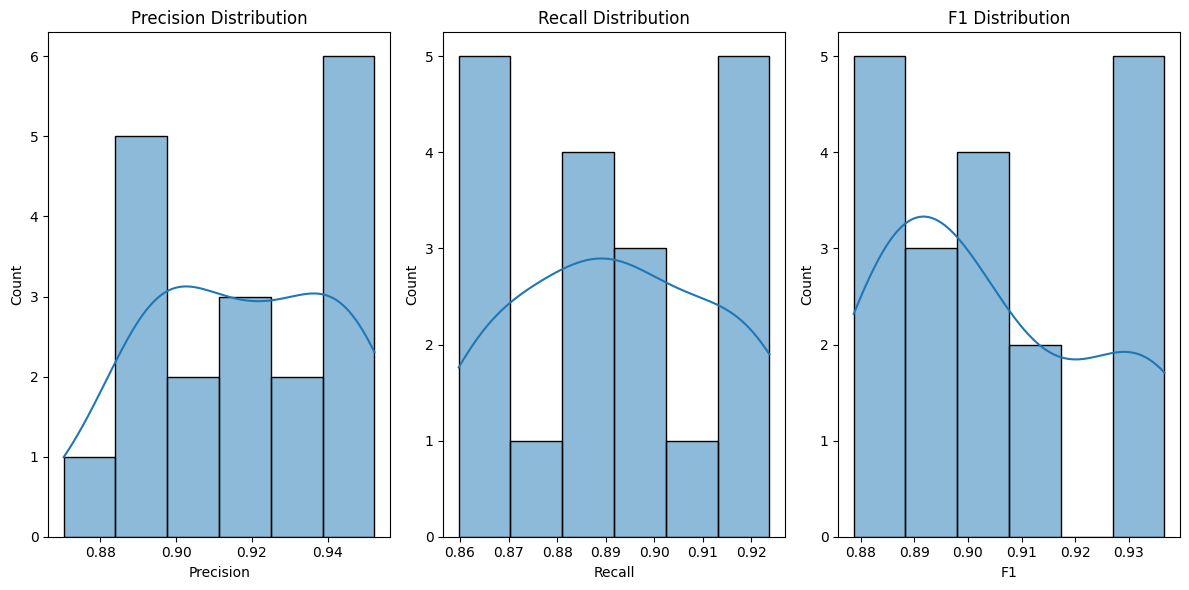

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from bert_score import score

metrics = ['Precision', 'Recall', 'F1']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.histplot(QA[metric], kde=True)
    plt.title(f'{metric} Distribution')

plt.tight_layout()
plt.show()


<ipython-input-29-4cc8fe3366a0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_metrics.index, y=average_metrics.values, palette='pastel')


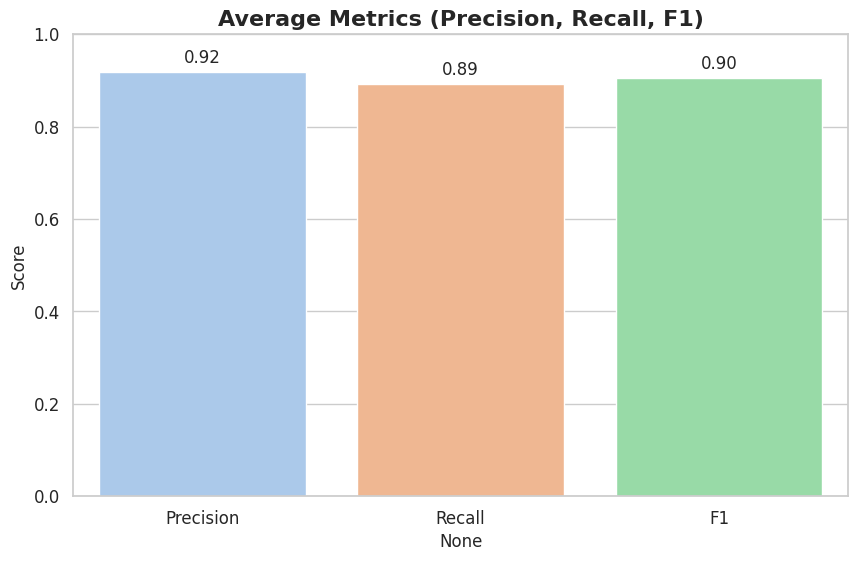

In [ ]:
sns.set_theme(style="whitegrid")

average_metrics = QA[['Precision', 'Recall', 'F1']].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_metrics.index, y=average_metrics.values, palette='pastel')

plt.title('Average Metrics (Precision, Recall, F1)', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, value in enumerate(average_metrics.values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=12)

# Hiển thị biểu đồ
plt.show()


In [ ]:
average_metrics = QA[['Precision', 'Recall', 'F1']].mean()
print("Average Precision:", average_metrics['Precision'])
print("Average Recall:", average_metrics['Recall'])
print("Average F1 Score:", average_metrics['F1'])


Average Precision: 0.9173041487994947
Average Recall: 0.892322910459418
Average F1 Score: 0.904506012013084


### Eval Topic Verse

In [ ]:

QA1=pd.read_csv('/content/questions_answers_with_llm_dtbtopic.csv')

In [ ]:
from bert_score import score

def compute_bertscore(row):
    P, R, F1 = score([row['LLM_Answer']], [row['Answer']], lang="en", verbose=False)
    return pd.Series([P.mean().item(), R.mean().item(), F1.mean().item()], index=["Precision", "Recall", "F1"])

QA1[['Precision', 'Recall', 'F1']] = QA1.apply(compute_bertscore, axis=1)
print(QA1[['Question', 'Precision', 'Recall', 'F1']])

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['ro

                                             Question  Precision    Recall  \
0   What is Presight's commitment to privacy as st...   0.881522  0.919768   
1   What is the purpose of information collection ...   0.925107  0.863681   
2   What types of personal data and usage data are...   0.883264  0.904956   
3   What are the purposes for which Data Presight ...   0.903239  0.895055   
4   Why will I be asked to confirm that my persona...   0.926444  0.907010   
5   How can I access my personal information held ...   0.948165  0.922915   
6   What is the purpose of the automated edit chec...   0.951104  0.909682   
7   To whom does the company disclose application ...   0.935201  0.897993   
8   Will my personal data be shared or transferred...   0.883455  0.927413   
9   What is the policy regarding the use of Google...   0.911787  0.867348   
10  How is data secured in this system, both when ...   0.918165  0.857337   
11  How long is customer data retained after an ac...   0.937892

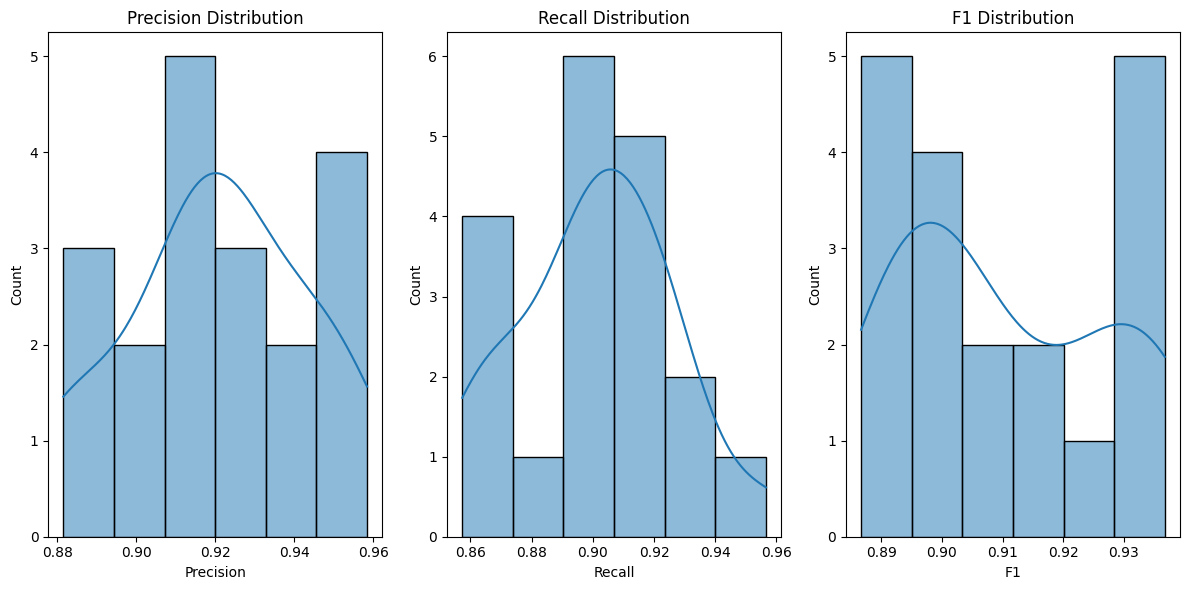

In [ ]:
metrics = ['Precision', 'Recall', 'F1']

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.histplot(QA1[metric], kde=True)
    plt.title(f'{metric} Distribution')

plt.tight_layout()
plt.show()


<ipython-input-28-c6e0f1f68935>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_metrics.index, y=average_metrics.values, palette='pastel')


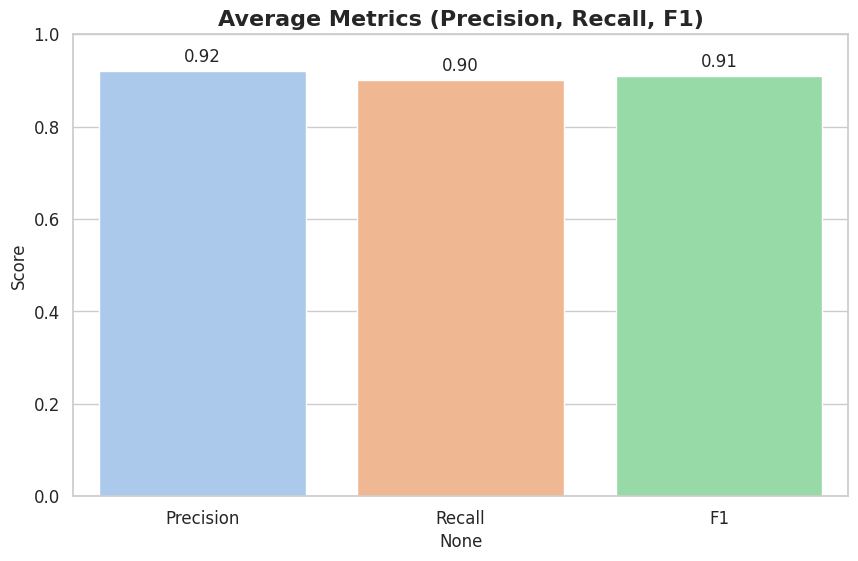

In [ ]:
sns.set_theme(style="whitegrid")

average_metrics = QA1[['Precision', 'Recall', 'F1']].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_metrics.index, y=average_metrics.values, palette='pastel')

plt.title('Average Metrics (Precision, Recall, F1)', fontsize=16, fontweight='bold')
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, value in enumerate(average_metrics.values):
    plt.text(i, value + 0.02, f'{value:.2f}', ha='center', fontsize=12)

plt.show()


In [ ]:
average_metrics = QA1[['Precision', 'Recall', 'F1']].mean()
print("Average Precision:", average_metrics['Precision'])
print("Average Recall:", average_metrics['Recall'])
print("Average F1 Score:", average_metrics['F1'])


Average Precision: 0.9203656347174394
Average Recall: 0.9007868515817743
Average F1 Score: 0.9101718726911043


## Conclusion

### Comments on Indexing Results

The results indicate that **topic-based indexing** performs better than **chunksize-based indexing** in this case.

### Reasons:
1. **Data Consistency**:
   - When indexing by **topic**, documents that are semantically related are grouped together, making information retrieval more accurate and easier.
   - Grouping documents by topic ensures that queries find documents with the same context, which improves the relevance of the search results.

2. **Scalability and Flexibility**:
   - Topic-based indexing allows for easy expansion with new topics, while chunksize-based indexing may struggle to handle long documents or documents with high complexity.
   - Using topics as indexes also helps in managing documents more efficiently when needing to classify and organize data into semantic groups.

3. **Query Efficiency**:
   - When using **chunksize** as an index, queries may return irrelevant documents or lack semantic depth, lowering the quality of search results.
   - On the other hand, topic-based indexing improves the relevance of search results, particularly when users want to search for detailed information on a specific topic.

### Conclusion:
With this dataset, **topic-based indexing** provides clear benefits in improving accuracy and efficiency of querying, as well as enhancing document organization and management. Therefore, topic-based indexing is the better choice compared to chunksize-based indexing in this specific case.


### Drawbacks of Topic-Based Indexing When Scaling Up

When scaling up and applying **topic-based indexing**, there are several important drawbacks to consider, especially when working with large data chunks or uneven topics. One significant issue is:

### 1. **Uneven Distribution Across Chunks**:
   - When documents are classified by **topic**, not every chunk contains evenly distributed information about a specific topic. This can result in **inconsistent context** in each chunk, making it more difficult to handle the data when performing a search.
   - **Uneven information depth and length**: Some topics may have a large volume of data, while others may have less, causing an imbalance across chunks. Chunks with insufficient or incomplete information about a topic may reduce the effectiveness of the query, especially when inputting data into models like LLMs.

### 2. **Difficulties in Managing Context for LLMs**:
   - When context is uneven across chunks, providing the full and accurate information to a **Large Language Model (LLM)** becomes more challenging. Some chunks may lack essential parts of the context needed for the LLM to generate a precise response, while others might contain excessive, irrelevant information.
   - **Context overload**: Feeding too much or too little information into the LLM can reduce the model's effectiveness, particularly when there isn't a clear method for adjusting and selecting the appropriate context.

### 3. **Challenges in Selecting the Right Context**:
   - With chunks containing different topics, choosing the correct context for the LLM becomes more complex, as the model may not fully understand the broader context of the topic. The lack of a filtering or selection strategy could result in important information being lost, affecting the quality of the LLM's output.
   
### 4. **Difficulty in Optimizing Search**:
   - Searching for relevant documents within a set of uneven chunks can lead to inaccurate results. Some chunks may contain rich information about a specific topic, while others may have little to no relevance. This creates inconsistency in search results and reduces the overall effectiveness of the system.

   
### Conclusion:
When using **topic-based indexing**, especially as the scale increases, issues like **uneven distribution across chunks** can affect the overall performance of the search system and the ability to provide context for LLMs. To mitigate these drawbacks, methods for efficient chunk segmentation and accurate context selection should be implemented, ensuring that each chunk contains sufficient and relevant information to support effective model operation.


### Indexing Based on Chunksize

**Chunksize-based indexing** is a method where documents are split into smaller segments (chunks) based on a defined size, often with a specific number of characters or words. This approach is particularly useful in situations where the documents are too large or complex to process as a whole.

### How It Works:
1. **Document Segmentation**:
   - Documents are split into smaller, manageable chunks. Each chunk is indexed separately, making it easier to search through large documents without needing to process them all at once.
   - This segmentation is typically done by character count or word count, with chunks designed to maintain a certain balance between size and relevance.

2. **Efficient Retrieval**:
   - By breaking documents into smaller pieces, the system can quickly retrieve the relevant chunk of text that matches the user's query. This makes the search process faster, especially for very large datasets.
   - Each chunk is indexed separately, which allows for targeted search within specific parts of the document.

3. **Flexibility**:
   - Chunksize indexing can adapt to documents of varying lengths. Since each document is divided into chunks, the system can scale with the size of the data and retrieve smaller, more focused pieces of information.
   - This flexibility is particularly useful when working with documents that have different formats or content structures.

### Drawbacks:
1. **Loss of Context**:
   - One of the main challenges with chunksize-based indexing is the potential loss of context. A chunk may contain part of a concept or idea, but without the surrounding context, it may not make sense in relation to the full document.
   - Queries may return fragmented information that doesn't provide enough context, which could reduce the quality of search results.

2. **Reduced Semantic Relevance**:
   - Since chunks are created based on size rather than semantic meaning, the search results may lack the depth of understanding of the topic. This may lead to queries returning chunks that are technically relevant but not fully aligned with the user's intent.

3. **Difficulties in Managing Large Chunks**:
   - When dealing with large or complex documents, choosing the appropriate chunksize can be challenging. Too small a chunk may result in too many fragments, while too large a chunk may still miss context or detail.
   - Managing and organizing these chunks effectively requires more processing and careful consideration of chunk sizes to balance efficiency and relevance.

### Conclusion:
While **chunksize-based indexing** offers flexibility and efficiency, particularly for large datasets, it may struggle with maintaining contextual relevance and semantic understanding. This approach is best suited for documents where context is less crucial, but care must be taken to ensure that the chunk sizes are optimized for the search system’s needs.
